<a href="https://colab.research.google.com/github/HUFS-Programming-2022/Junsu_202102707/blob/main/week_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [2]:
import nltk
nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [3]:
brown = nltk.corpus.brown

In [4]:
#cfd
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


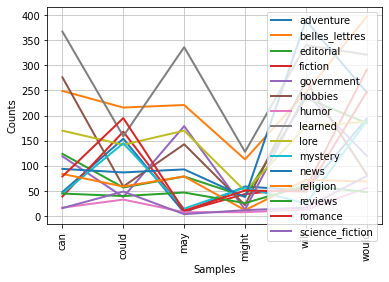

In [5]:
#바로 위 코드를 cfd 하나로!
import nltk
nltk.download('brown')
from nltk.corpus import brown



cfd = nltk.ConditionalFreqDist(
    (genre, modals)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
    for modals in ['can', 'could', 'may', 'might', 'will', 'would']
      if word.lower() == modals
)

cfd.tabulate()
cfd.plot()

### Inaugural
- 연설문 코퍼스
- 연도-이름.txt

In [6]:
inaugural = nltk.corpus.inaugural

In [7]:
inaugural.fileids()[:5]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

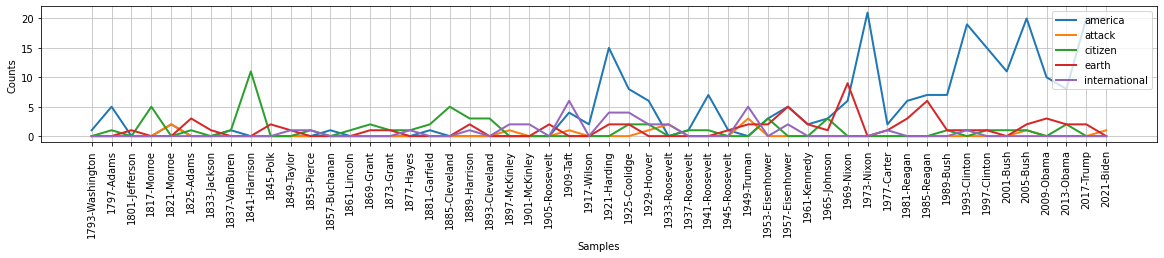

In [8]:
inaugural = nltk.corpus.inaugural

cfd = nltk.ConditionalFreqDist(
    (words, file[:-4])
    for file in inaugural.fileids()
    for words in ['citizen', 'america', 'earth', 'international', 'attack']

    for word in inaugural.words(fileids=file)
      if word.lower() == words
)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 2.5))
cfd.plot()

### Tuple & List
- 불변 객체 vs. 가변 객체

In [9]:
# 생성
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [10]:
#1.1 요소가 여러 개일 때
alphabetT = ('a', 'b') #튜플
alphabetT = 'a', 'b'  #튜플
alphabetT

alphabetL = ['a', 'b']  #리스트

In [11]:
#1.2 요소가 1개일 때
alphaT = ('a') #str(튜플 아님)

alphaT = ('b',) # 튜플

#리스트는 상관 없음

- packing: 한 변수에 여러 데이터를 할당하는 것.
  - list, tuple 자체
    - a = [1, 2, 3]

- unpacking: 한 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누는 것
  - a='k', b='i', c='m'

In [12]:
a, b, c = 'kim' #unpacking
a, b, c

('k', 'i', 'm')

###값 교환하기

In [13]:
pwd = 'abcd'
userid = 'sky'

pwd = userid
pwd, userid

('sky', 'sky')

In [14]:
pwd = 'abcd'
userid = 'sky'
'''
temp1 = userid
temp2 = pwd
pwd = temp1
userid = temp2
'''

pwd, userid = userid, pwd
pwd, userid

('sky', 'abcd')

In [15]:
#연산
x = ('a',)
y = (1, 2)
('a',) + (1, 2)
(1, 2) * 3

id(x), id(x + y)

(140281025426256, 140281026752016)

In [16]:
#비교
x = 1, 2
y = 1, 6

x < y

True

In [17]:
#순회
for i in x:
  print(x)

(1, 2)
(1, 2)


In [18]:
[i for i in x] #1

[1, 2]

In [19]:
#tuple comprehension?
tuple([i for i in x]) #2
*[i for i in x], #느림 #3

(1, 2)

In [20]:
#형변환

dog = 'dog'
dogT = tuple(dog)
tuple(dog), list(dog), (dog,)

(('d', 'o', 'g'), ['d', 'o', 'g'], ('dog',))

In [21]:
#슬라이싱도 동일하게 가능하다.
dogT[0]

'd'

[정리]
- tuple 장점
  - 변하지 않는 데이터 시퀀스를 만들 수 있다.
  - 타인의 접근 막는다.
  - 메모리 사용 적다.
-list 장점
  - 튜플 장점 필요 없을 때 전부 리스트 사용
  - 데이터를 순차적으로 파악할 때
  - 중복 데이터를 쓸 수 있음 vs. set

### 리스트의 유용한 함수들
- 변경, 삭제, 추가
- 리스트컴프리핸션 업그레이드

- list.append(value)
- list.insert(index, value)
- list.extend(list')
- del list[]
- list.remove(value)
- list.pop(index)
- list.clear()
- sort(), sorted()
- reverse(), reversed()


In [22]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [23]:
#추가
num.append(6) #마지막에 요소 1개 추가

In [24]:
num #append한 뒤 다시 할당할 필요가 없음

[0, 1, 2, 3, 4, 6]

In [25]:
# insert(index, item)
num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 6]

In [26]:
#여러 개 추가
num.extend([6,6,6]) #리스트에 리스트 확장(한번 더 실행하면 추가된 것에 더 추가됨)
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6]

In [27]:
x = [6, 6, 6]

num.append(x)
num   #리스트가 추가됨

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [28]:
num += x
num   #extend와 동일

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [29]:
#offset
num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [30]:
#slice
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [31]:
num[:3] = 'cat'
num

['c', 'a', 't', 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [32]:
#삭제
del num[:3]
num

[2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [33]:
#remove(value)
num.remove(2)
num

[3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [34]:
# pop(index) 인덱스 기본값: -1
num.pop()
num

[3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6]

In [35]:
num.pop(0)
num

[4, 6, 6, 6, 6, [6, 6, 6], 6, 6]

In [36]:
#clear
num.clear()
num

[]

In [37]:
# 인덱스
num = list(range(5))
num.index(4)

4

In [38]:
0 in num

True

In [39]:
#정렬: sort(), sorted()
sorted(num, reverse=True), num #변환값만 복사해서 출력

([4, 3, 2, 1, 0], [0, 1, 2, 3, 4])

In [40]:
num.sort(reverse=True) #리스트.sort(), 값을 할당하지 않아도 됨
num

[4, 3, 2, 1, 0]

In [41]:
#reverse(), reversed()
num.reverse()
reversed(num)

### 복사
- shallow copy
  - b = a.copy()
  - b = a[:]
  - b = list(a)

- deep copy
  - import copy \n b = copy.deepcopy(a)

In [42]:
# 할당
a = list(range(1,5))
a

[1, 2, 3, 4]

In [43]:
b = a # 같은 메모리주소를 참조하는 것
b[0] = 6
a, b

([6, 2, 3, 4], [6, 2, 3, 4])

In [44]:
id(a), id(b)

(140281025296336, 140281025296336)

In [45]:
#shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법. 얕은 복사
c = a.copy()
d = list(a)
e = a[:]

id(a), id(c), id(d), id(e)

(140281025296336, 140281025391344, 140281030431360, 140281025391824)

In [50]:
a = list(range(1,5))
a.append([1, 2, 3])

f = a.copy()
id(a), id(f)
f[-1][0] = 9    #리스트 안에 리스트 있을 때 접근하는 방법
a, f

([1, 2, 3, 4, [9, 2, 3]], [1, 2, 3, 4, [9, 2, 3]])

In [51]:
#deepcopy: 깊은 복사, 하위에 중첩된 리스트 요소가 안 바뀌도록
import copy
g = copy.deepcopy(a)
g

[1, 2, 3, 4, [9, 2, 3]]

In [53]:
g[-1][0] = 10
a, g    #g가 바뀌어도 a는 바뀌지 않음

([1, 2, 3, 4, [9, 2, 3]], [1, 2, 3, 4, [10, 2, 3]])

### 순회
- zip: 여러 리스트를 동시에 순회
- enumerate: 인덱스 + 요소

In [54]:
# 순회: zip, enumerate
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

# (name, age)
for item1, item2 in zip(name, age): #여러 리스트를 동시에 순회
  print((item1, item2))

('kate', 77)
('royce', 44)
('phill', 54)


In [55]:
for item1 in name:
  for item2 in age:
    print((item1, item2))

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [56]:
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [57]:
#리스트+인덱스 enumerate

for idx, item in enumerate(name):
  print(idx, item)

0 kate
1 royce
2 phill


In [58]:
for item in enumerate(name):
  print(item)

(0, 'kate')
(1, 'royce')
(2, 'phill')


In [59]:
"""
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

list(zip(name, age))

를 리스트 컴프리헨션 써서 출력해보기
"""
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

[word for word in zip(name, age)]
# [(i, j+33) for i,j in zip(name, age)] 두 요소 중에서 한가지를 바꾸고 싶을 때!

[('kate', 77), ('royce', 44), ('phill', 54)]

In [60]:
#리컴 쓰지 않고 for문 사용
list = []
for i, j in zip(name, age):
  list.append((i, j))

print(list)

[('kate', 77), ('royce', 44), ('phill', 54)]


In [61]:
#1. for문의 리,컴으로 바꿔보기
"""
for i in name:
  for j in age:
    print(i, j)
"""

[(i, j) for j in age for i in name], [(i, j) for i in name for j in age]

([('kate', 77),
  ('royce', 77),
  ('phill', 77),
  ('kate', 44),
  ('royce', 44),
  ('phill', 44),
  ('kate', 54),
  ('royce', 54),
  ('phill', 54)],
 [('kate', 77),
  ('kate', 44),
  ('kate', 54),
  ('royce', 77),
  ('royce', 44),
  ('royce', 54),
  ('phill', 77),
  ('phill', 44),
  ('phill', 54)])

In [62]:
#2. [i, j] 리스트의 리스트로 바꿔보기 (리,컴)

[[(i, j) for j in age] for i in name]

[[('kate', 77), ('kate', 44), ('kate', 54)],
 [('royce', 77), ('royce', 44), ('royce', 54)],
 [('phill', 77), ('phill', 44), ('phill', 54)]]

In [63]:
list = []
[list.append([i, j]) for j in age for i in name]    #뭐지?

[None, None, None, None, None, None, None, None, None]

In [64]:
sentence = "do not judge a book by its cover"
tokens = sentence.split(' ')
[(word.upper(), word.title(), len(word)) for word in tokens]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [65]:
#문장마다 스트링으로 바꿔서 리스트로 반환
text = [
        ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
        ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

[' '.join(sents) for sents in text]

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [66]:
#전체를 스트링으로 반환
text = [
        ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
        ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

' '.join([' '.join(sents) for sents in text])

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [67]:
#전체 단어 리스트 가져오기

text = [
        ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
        ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

[words for sents in text for words in sents]

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

### List Comprehension + if, else
- if, else를 for 앞에다가 씀

In [68]:
[i if i%2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']